<a href="https://colab.research.google.com/github/Bor-Cherng/Bor-Cherng-SQL-Python-Projects/blob/main/7_Analyzing_Unicorn_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

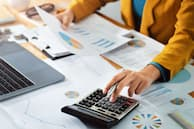

Did you know that the average return from investing in stocks is [10% per year](https://www.nerdwallet.com/article/investing/average-stock-market-return) (not accounting for inflation)? But who wants to be average?!

You have been asked to support an investment firm by analyzing trends in high-growth companies. They are interested in understanding which industries are producing the highest valuations and the rate at which new high-value companies are emerging. Providing them with this information gives them a competitive insight as to industry trends and how they should structure their portfolio looking forward.

You have been given access to their `unicorns` database, which contains the following tables:

## dates
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `date_joined` | The date that the company became a unicorn.  |
| `year_founded` | The year that the company was founded.       |

## funding
| Column           | Description                                  |
|----------------- |--------------------------------------------- |
| `company_id`       | A unique ID for the company.                 |
| `valuation`        | Company value in US dollars.                 |
| `funding`          | The amount of funding raised in US dollars.  |
| `select_investors` | A list of key investors in the company.      |

## industries
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `industry`     | The industry that the company operates in.   |

## companies
| Column       | Description                                       |
|------------- |-------------------------------------------------- |
| `company_id`   | A unique ID for the company.                      |
| `company`      | The name of the company.                          |
| `city`         | The city where the company is headquartered.      |
| `country`      | The country where the company is headquartered.   |
| `continent`    | The continent where the company is headquartered. |


# The output

Your query should return a table in the following format:
| industry  | year | num\_unicorns       | average\_valuation\_billions |
| --------- | ---- | ------------------- | ---------------------------- |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |

Where `industry1`, `industry2`, and `industry3` are the three top-performing industries.

In [ ]:
SELECT i.industry, TO_CHAR(d.date_joined, 'YYYY') AS year, COUNT(c.company) AS num_unicorns, ROUND(AVG(f.valuation)/1000000000, 2) AS average_valuation_billions
FROM dates AS d
INNER JOIN funding AS f
ON d.company_id = f.company_id
INNER JOIN industries AS i
ON d.company_id = i.company_id
INNER JOIN companies AS c
ON d.company_id = c.company_id
WHERE i.industry = 'Fintech'
OR i.industry = 'Internet software & services'
OR i.industry = 'E-commerce & direct-to-consumer'
GROUP BY industry, year
HAVING TO_CHAR(d.date_joined, 'YYYY') = '2019'
OR TO_CHAR(d.date_joined, 'YYYY') = '2020'
OR TO_CHAR(d.date_joined, 'YYYY') = '2021'
ORDER BY year DESC, num_unicorns DESC

,industry,year,num_unicorns,average_valuation_billions
0,Fintech,2021,138,2.75
1,Internet software & services,2021,119,2.15
2,E-commerce & direct-to-consumer,2021,47,2.47
3,Internet software & services,2020,20,4.35
4,E-commerce & direct-to-consumer,2020,16,4.00
5,Fintech,2020,15,4.33
6,Fintech,2019,20,6.80
7,Internet software & services,2019,13,4.23
8,E-commerce & direct-to-consumer,2019,12,2.58


In [ ]:
SELECT industry, COUNT(*) AS count
FROM industries
INNER JOIN dates
ON industries.company_id = dates.company_id
WHERE TO_CHAR(date_joined, 'YYYY') = '2019'
OR TO_CHAR(date_joined, 'YYYY') = '2020'
OR TO_CHAR(date_joined, 'YYYY') = '2021'
GROUP BY industry
ORDER BY count DESC

,industry,count
0,Fintech,173
1,Internet software & services,152
2,E-commerce & direct-to-consumer,75
3,Artificial intelligence,53
4,Health,52
5,Other,41
6,Cybersecurity,38
7,"Supply chain, logistics, & delivery",35
8,Data management & analytics,31
9,Mobile & telecommunications,18


In [ ]:
WITH RankedIndustries AS (
    SELECT
        i.industry,
        TO_CHAR(d.date_joined, 'YYYY') AS year,
        COUNT(c.company) AS num_unicorns,
        ROUND(AVG(f.funding), 2) AS average_valuation_billions,
        ROW_NUMBER() OVER (PARTITION BY TO_CHAR(d.date_joined, 'YYYY') ORDER BY COUNT(c.company) DESC) AS rank
    FROM
        dates AS d
    INNER JOIN
        funding AS f ON d.company_id = f.company_id
    INNER JOIN
        industries AS i ON d.company_id = i.company_id
    INNER JOIN
        companies AS c ON d.company_id = c.company_id
    WHERE
        i.industry IN ('Fintech', 'Internet software & services', 'E-commerce & direct-to-consumer')
        AND TO_CHAR(d.date_joined, 'YYYY') IN ('2019', '2020', '2021')
    GROUP BY
        i.industry, TO_CHAR(d.date_joined, 'YYYY')
)
SELECT
    industry,
    year,
    num_unicorns,
    average_valuation_billions
FROM
    RankedIndustries
WHERE
    rank <= 3
ORDER BY
    year DESC, num_unicorns DESC;


,industry,year,num_unicorns,average_valuation_billions
0,Fintech,2021,138,3.866594e+08
1,Internet software & services,2021,119,3.099328e+08
2,E-commerce & direct-to-consumer,2021,47,4.955319e+08
3,Internet software & services,2020,20,4.331000e+08
4,E-commerce & direct-to-consumer,2020,16,1.084500e+09
5,Fintech,2020,15,6.432667e+08
6,Fintech,2019,20,7.544000e+08
7,Internet software & services,2019,13,6.044615e+08
8,E-commerce & direct-to-consumer,2019,12,5.662500e+08


In [ ]:
WITH RankedIndustries AS (
    SELECT
        i.industry,
        TO_CHAR(d.date_joined, 'YYYY') AS year,
        COUNT(c.company) AS num_unicorns,
        ROUND(AVG(f.funding), 2) AS average_valuation_billions,
        ROW_NUMBER() OVER (PARTITION BY TO_CHAR(d.date_joined, 'YYYY') ORDER BY COUNT(c.company) DESC) AS rank
    FROM
        dates AS d
    INNER JOIN
        funding AS f ON d.company_id = f.company_id
    INNER JOIN
        industries AS i ON d.company_id = i.company_id
    INNER JOIN
        companies AS c ON d.company_id = c.company_id
    WHERE
        i.industry IN ('Fintech', 'Internet software & services', 'E-commerce & direct-to-consumer')
        AND TO_CHAR(d.date_joined, 'YYYY') IN ('2019', '2020', '2021')
    GROUP BY
        i.industry, TO_CHAR(d.date_joined, 'YYYY')
)
SELECT
    industry,
    year,
    num_unicorns,
    average_valuation_billions
FROM
    RankedIndustries
WHERE
    rank = 1
ORDER BY
    year DESC;



,industry,year,num_unicorns,average_valuation_billions
0,Fintech,2021,138,3.866594e+08
1,Internet software & services,2020,20,4.331000e+08
2,Fintech,2019,20,7.544000e+08
